In [1]:
!pip install catboost
!pip install lightgbm
!pip install --upgrade scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
import lightgbm as lgb
import time

In [3]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.filterwarnings("ignore", category=SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Data preparation

In [4]:
df = pd.read_csv(r'C:/Users/kevin/datasets/car_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
df.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
5,04/04/2016 17:36,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,04/04/2016 00:00,0,33775,06/04/2016 19:17
6,01/04/2016 20:48,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,01/04/2016 00:00,0,67112,05/04/2016 18:18
7,21/03/2016 18:54,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,21/03/2016 00:00,0,19348,25/03/2016 16:47
8,04/04/2016 23:42,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,04/04/2016 00:00,0,94505,04/04/2016 23:42
9,17/03/2016 10:53,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,17/03/2016 00:00,0,27472,31/03/2016 17:17


In [7]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [8]:
df.duplicated().sum()

262

In [9]:
df.dropna(inplace=True) 
df.drop_duplicates(inplace=True)

Dropped all rows with missing values. Rows that are missing values are not giving us the full story of the vehicle. Missing information for automobiles that are on sale is unattractive to future customers since buying a vehicle is a big decision in a customer's life. Using accurate information is important. Also, the data does not need to show a automobile exact information twice. Duplicate rows were dropped as well. 

In [10]:
# df['DateCrawled'] = pd.to_datetime(df['DateCrawled'])
# df['LastSeen'] = pd.to_datetime(df['LastSeen'])
# df['DateCreated'] = pd.to_datetime(df['DateCreated'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245567 entries, 3 to 354367
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        245567 non-null  object
 1   Price              245567 non-null  int64 
 2   VehicleType        245567 non-null  object
 3   RegistrationYear   245567 non-null  int64 
 4   Gearbox            245567 non-null  object
 5   Power              245567 non-null  int64 
 6   Model              245567 non-null  object
 7   Mileage            245567 non-null  int64 
 8   RegistrationMonth  245567 non-null  int64 
 9   FuelType           245567 non-null  object
 10  Brand              245567 non-null  object
 11  NotRepaired        245567 non-null  object
 12  DateCreated        245567 non-null  object
 13  NumberOfPictures   245567 non-null  int64 
 14  PostalCode         245567 non-null  int64 
 15  LastSeen           245567 non-null  object
dtypes: int64(7), object(

In [12]:
target = df['Price']
features = df.drop(['DateCrawled','Price','RegistrationMonth','DateCreated','NumberOfPictures','PostalCode','LastSeen'], axis=1)

Columns that were dropped were features that did not affect price of the vehicle. The dates were dropped because they were refering to the websites, like profile creation and last time the page was viewed. The number of pictures on the wbesite is not relevant and postal code does not affect the price of the car. 

In [13]:
features

,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
3,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
7,sedan,1980,manual,50,other,40000,petrol,volkswagen,no
...,...,...,...,...,...,...,...,...,...
354360,wagon,2005,manual,3,3er,150000,gasoline,bmw,no
354362,sedan,2004,manual,225,leon,150000,petrol,seat,yes
354363,bus,2000,manual,0,zafira,150000,petrol,opel,no
354366,convertible,2000,auto,101,fortwo,125000,petrol,smart,no


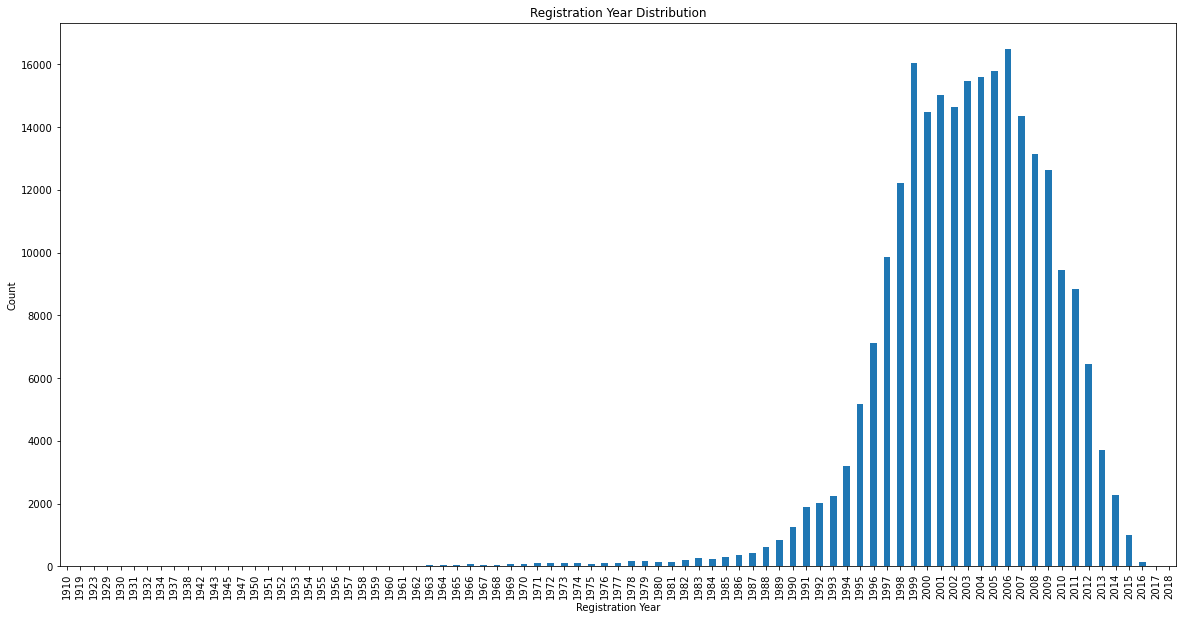

In [14]:
registration_year_counts = df['RegistrationYear'].value_counts().sort_index()
plt.figure(figsize=(20, 10))
registration_year_counts.plot(kind='bar')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.title('Registration Year Distribution')
plt.show()

Majority of cars in this data set were registered in the 2000's and late 90's. 

In [15]:
def values(columns):
    total = features[columns].value_counts()
    return total

print(values('Gearbox'))
print()
print(values('NotRepaired'))
print()
print(values('Model'))
print()
print(values('FuelType'))
print()
print(values('Brand'))

manual    194529
auto       51038
Name: Gearbox, dtype: int64

no     217767
yes     27800
Name: NotRepaired, dtype: int64

golf                  20184
other                 18464
3er                   14877
polo                   8797
corsa                  8255
                      ...  
i3                        4
samara                    3
serie_3                   3
range_rover_evoque        2
rangerover                2
Name: Model, Length: 249, dtype: int64

petrol      162426
gasoline     78478
lpg           3903
cng            454
hybrid         180
other           73
electric        53
Name: FuelType, dtype: int64

volkswagen       51787
bmw              27213
opel             26184
mercedes_benz    23902
audi             21537
ford             17084
renault          11623
peugeot           7814
fiat              6329
seat              4903
skoda             4391
mazda             3957
citroen           3659
toyota            3619
nissan            3502
smart             33

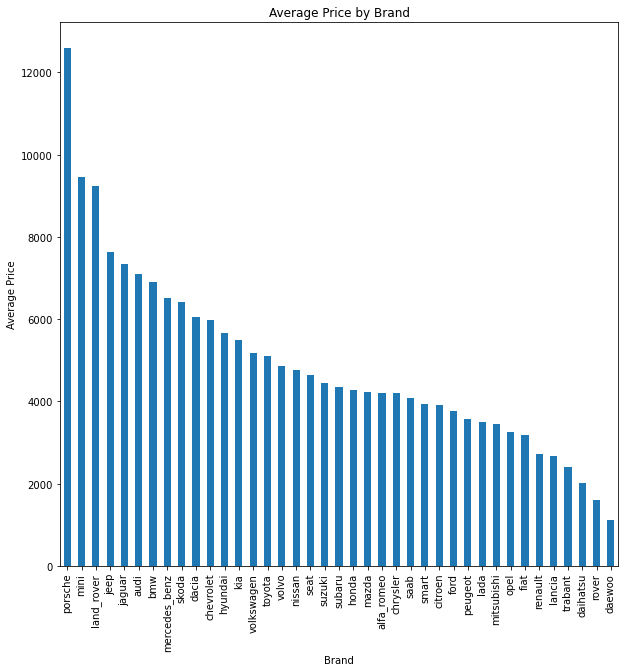

In [16]:
avg_price_by_brand = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 10))
avg_price_by_brand.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price by Brand')
plt.show()

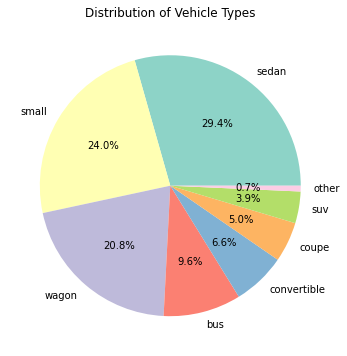

In [17]:
vehicle_type_counts = df['VehicleType'].value_counts()


plt.figure(figsize=(10, 6))
sns.set_palette("Set3")  # Set color palette for the pie chart
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Vehicle Types')


plt.show()

In [18]:
def label(column):
    encoder = LabelEncoder() 
    df[column] = encoder.fit_transform(df[column])  

    return df[column]


vehicle_type_encoded = label('VehicleType')
brand_encoded = label('Brand')
model_encoded = label('Model')
fuel_type_encoded = label('FuelType')

features['VehicleType'] = vehicle_type_encoded
features['Brand'] = brand_encoded
features['Model'] = model_encoded
features['FuelType'] = fuel_type_encoded



In [19]:
def onehot(column):
    encoder = OneHotEncoder(sparse=False)  # Set sparse=False to get a dense array
    encoded_column = encoder.fit_transform(df[[column]])  # Pass column as a list to get a 2D array

    return encoded_column

gearbox_encoded = onehot('Gearbox')
not_repaired_encoded = onehot('NotRepaired')

features['Gearbox'] = gearbox_encoded
features['NotRepaired'] = not_repaired_encoded

In [20]:
features

,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
3,5,2001,0.0,75,116,150000,6,37,1.0
4,5,2008,0.0,69,101,90000,2,31,1.0
5,4,1995,0.0,102,11,150000,6,2,0.0
6,1,2004,0.0,109,8,150000,6,25,1.0
7,4,1980,0.0,50,166,40000,6,37,1.0
...,...,...,...,...,...,...,...,...,...
354360,7,2005,0.0,3,11,150000,2,2,1.0
354362,4,2004,0.0,225,140,150000,6,30,0.0
354363,0,2000,0.0,0,248,150000,6,24,1.0
354366,1,2000,1.0,101,106,125000,6,32,1.0


All feature data is now numerical and encoded to create regression models. 

## Model training

In [21]:
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size=0.25,
                                                                           random_state=12345)

features_train, features_valid, target_train, target_valid = train_test_split(features_train,target_train,test_size=.3,
                                                                             random_state=12345)

In [26]:
scaler = StandardScaler()
numeric = ['VehicleType', 'RegistrationYear', 'Gearbox', 'Power','Model', 'Mileage', 'FuelType', 'Brand', 'NotRepaired']
scaler.fit_transform(features_train)

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])



print(features_train[numeric])
print(features_valid[numeric])
print(features_test[numeric])

        VehicleType  RegistrationYear   Gearbox     Power     Model   Mileage  \
267550     0.347780         -0.475752 -0.359872 -0.844102 -0.465193  0.610817   
129278    -0.120902          0.173195 -0.359872 -0.106868  0.112062  0.610817   
137133     0.347780         -0.313515 -0.359872 -0.844102 -0.352558  0.610817   
214342    -0.120902         -0.637989 -0.359872 -0.036655  0.112062  0.610817   
287436     1.285144         -0.800226 -0.359872 -0.317506 -0.141367 -0.063721   
...             ...               ...       ...       ...       ...       ...   
333253     0.816462          0.335432 -0.359872  0.209090  0.816031 -1.008075   
111966    -0.120902          0.822142 -0.359872 -0.029634 -1.056527 -1.277891   
304018    -0.120902         -0.800226 -0.359872 -0.212187  0.647078  0.610817   
344155    -0.120902          0.497669 -0.359872 -0.078783 -1.056527  0.610817   
214476     1.285144         -0.151279 -0.359872  0.138877  1.731191  0.610817   

        FuelType     Brand 

In [27]:
model = LinearRegression()


start_time = time.time()
model.fit(features_train, target_train)
training_timelr = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_valid)
prediction_timelr = time.time() - start_time

mse = mean_squared_error(target_valid, model_predict)
rmse_lr = np.sqrt(mse)
r_squaredlr = r2_score(target_valid, model_predict)

print("R-squared:", r_squaredlr)
print("RMSE:", rmse_lr)
print("Training Time:", training_timelr)
print("Prediction Time:", prediction_timelr)


R-squared: 0.4479818335036714
RMSE: 3501.144586198198
Training Time: 0.03434348106384277
Prediction Time: 0.0016257762908935547


In [28]:
model = RandomForestRegressor(max_depth=35, random_state=12345)


start_time = time.time()
model.fit(features_train, target_train)
training_timerf = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_valid)
prediction_timerf = time.time() - start_time

mse = mean_squared_error(target_valid, model_predict)
rmse_rf = np.sqrt(mse)
r_squaredrf = r2_score(target_valid, model_predict)

print("R-squared:", r_squaredrf)
print("RMSE:", rmse_rf)
print("Training Time:", training_timerf)
print("Prediction Time:", prediction_timerf)

R-squared: 0.8715276673069356
RMSE: 1689.0331207617294
Training Time: 39.66379380226135
Prediction Time: 1.501720666885376


In [29]:
model = RandomForestRegressor(n_estimators=50,max_depth=25,random_state=12345)


start_time = time.time()
model.fit(features_train, target_train)
training_timerf2 = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_valid)
prediction_timerf2 = time.time() - start_time

mse = mean_squared_error(target_valid, model_predict)
rmse_rf2 = np.sqrt(mse)
r_squaredrf2 = r2_score(target_valid, model_predict)

print("R-squared:", r_squaredrf2)
print("RMSE:", rmse_rf2)
print("Training Time:", training_timerf2)
print("Prediction Time:", prediction_timerf2)

R-squared: 0.871323181431365
RMSE: 1690.3767800706128
Training Time: 18.51476526260376
Prediction Time: 0.7885279655456543


In [30]:
model = GradientBoostingRegressor(n_estimators=50, max_depth=25, random_state=12345)


start_time = time.time()
model.fit(features_train, target_train)
training_timegb = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_valid)
prediction_timegb = time.time() - start_time

mse = mean_squared_error(target_valid, model_predict)
rmse_gb = np.sqrt(mse)
r_squaredgb = r2_score(target_valid, model_predict)

print("R-squared:", r_squaredgb)
print("RMSE:", rmse_gb)
print("Training Time:", training_timegb)
print("Prediction Time:", prediction_timegb)

R-squared: 0.8273533722496793
RMSE: 1957.9987531555475
Training Time: 29.881023406982422
Prediction Time: 0.8181169033050537


In [31]:
train_data = lgb.Dataset(features_train, label=target_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 90,
    'learning_rate': 0.15,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


start_time = time.time()
model = lgb.train(params, train_data, num_boost_round=100)
training_timelgb = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_valid)
prediction_timelgb = time.time() - start_time

rmse_lgb = np.sqrt(mean_squared_error(target_valid, model_predict))
r_squaredlgb = r2_score(target_valid, model_predict)

print("R-squared:", r_squaredlgb)
print("RMSE:", rmse_lgb)
print("Training Time:", training_timelgb)
print("Prediction Time:", prediction_timelgb)


R-squared: 0.8770274129887965
RMSE: 1652.4849610693725
Training Time: 0.5990855693817139
Prediction Time: 0.046878814697265625


In [32]:
model = CatBoostRegressor(iterations=200,
                          learning_rate=0.1,
                          depth=6,
                          l2_leaf_reg=3,
                          random_seed=12345)


start_time = time.time()
model.fit(features_train, target_train)
training_timecb = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_valid)
prediction_timecb = time.time() - start_time

rmse_cb = np.sqrt(mean_squared_error(target_valid, model_predict))
r_squaredcb = r2_score(target_valid, model_predict)

print("R-squared:", r_squaredcb)
print("RMSE:", rmse_cb)
print("Training Time:", training_timecb)
print("Prediction Time:", prediction_timecb)



0:	learn: 4405.4882266	total: 165ms	remaining: 32.8s
1:	learn: 4132.8303608	total: 176ms	remaining: 17.4s
2:	learn: 3882.5900171	total: 187ms	remaining: 12.3s
3:	learn: 3669.1405734	total: 198ms	remaining: 9.69s
4:	learn: 3477.6315367	total: 209ms	remaining: 8.13s
5:	learn: 3309.3074497	total: 221ms	remaining: 7.13s
6:	learn: 3164.7321672	total: 232ms	remaining: 6.39s
7:	learn: 3040.6203055	total: 242ms	remaining: 5.81s
8:	learn: 2929.8629576	total: 253ms	remaining: 5.36s
9:	learn: 2831.3649503	total: 264ms	remaining: 5.01s
10:	learn: 2744.4125536	total: 274ms	remaining: 4.71s
11:	learn: 2669.3691905	total: 285ms	remaining: 4.46s
12:	learn: 2602.1375312	total: 295ms	remaining: 4.25s
13:	learn: 2544.2023623	total: 305ms	remaining: 4.06s
14:	learn: 2493.8871093	total: 316ms	remaining: 3.89s
15:	learn: 2445.7432651	total: 327ms	remaining: 3.76s
16:	learn: 2405.6742781	total: 338ms	remaining: 3.63s
17:	learn: 2371.7219252	total: 349ms	remaining: 3.53s
18:	learn: 2339.2757876	total: 362ms	r

## Model analysis (Speed and Quality)

In [33]:
modelperformance = pd.DataFrame({'model': ['LinearRegression', 'RandomForestRegressor','RandomForestRegressor 2nd Model', 'Gradient Booster Regressor',
                                           'LightGBM','CatBoostRegressor'],
              'RMSE': [rmse_lr,rmse_rf,rmse_rf2,rmse_gb,rmse_lgb,rmse_cb],
              'R2': [r_squaredlr,r_squaredrf,r_squaredrf2,r_squaredgb,r_squaredlgb,r_squaredcb],
              'Training Time': [training_timelr,training_timerf,r_squaredrf2,training_timegb,training_timelgb,training_timecb],
              'Prediction Time': [prediction_timelr,prediction_timerf,prediction_timerf2,prediction_timegb,prediction_timelgb,prediction_timecb]})

modelperformance

,model,RMSE,R2,Training Time,Prediction Time
0,LinearRegression,3501.144586,0.447982,0.034343,0.001626
1,RandomForestRegressor,1689.033121,0.871528,39.663794,1.501721
2,RandomForestRegressor 2nd Model,1690.376780,0.871323,0.871323,0.788528
3,Gradient Booster Regressor,1957.998753,0.827353,29.881023,0.818117
4,LightGBM,1652.484961,0.877027,0.599086,0.046879
5,CatBoostRegressor,1785.372234,0.856454,2.537712,0.015702


The RMSE score is a useful way to see how well a model is able to fit a dataset. The larger the RMSE, the larger the difference between the predicted and observed values, which means the worse a model fits the data. Conversely, the smaller the RMSE, the better a model is able to fit the data. It can be particularly useful to compare the RMSE of two different models with each other to see which model fits the data better. From the analysis done, the LightGBM had the lowest RMSE score and only took 5 seconds to fully train. Therefore, LightGBM will be used for final testing on the test set. 

In [34]:
train_data = lgb.Dataset(features_train, label=target_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 90,
    'learning_rate': 0.15,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


start_time = time.time()
model = lgb.train(params, train_data, num_boost_round=100)
training_timelgb = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_test)
prediction_timelgb = time.time() - start_time

rmse_lgb = np.sqrt(mean_squared_error(target_test, model_predict))
r_squaredlgb = r2_score(target_test, model_predict)

print("R-squared:", r_squaredlgb)
print("RMSE:", rmse_lgb)
print("Training Time:", training_timelgb)
print("Prediction Time:", prediction_timelgb)

R-squared: 0.8763476094032345
RMSE: 1661.1942235909237
Training Time: 0.5466451644897461
Prediction Time: 0.06250405311584473


# Conclusion

The project was begun by exploring the data-set and viewing duplicates, missing values, and deciding what data to be kept as features to find the target, price of the vehicle. Missing values were dropped because the features were to represent any sort of variable that woud affect price. Any unaccurate data or missing data would not help reflect the price of the vehicle. 
All duplicates were drop since the model did not need to recognize the same vehicle with the same features. The features and target were then explored through the use of pie charts, bar graphs, and Series to display the distribution of data. 

Linear Regression, Random Forest Regression, Gradient Boosting Regression, LightGBM, and Cat Boot Regressor were used to validate the models. After training different models, LightGBM had the lowest RMSE with a 5 second training time and a <1 second prediction time. The model showed quality results, plus relatively quick speed to train. 